<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [22]:
# import your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the health insurance dataset and check the first five observations

In [4]:
# import your code here
df=pd.read_csv('health_insurance.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi'>

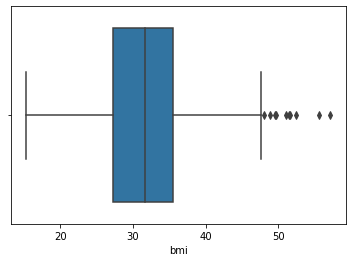

In [9]:
# import your code here
# Boxplot used to find outliers
sns.boxplot(x=df['bmi'])
#Yes there are extreme observations present in BMI

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

D:\DataScience\Workspace\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

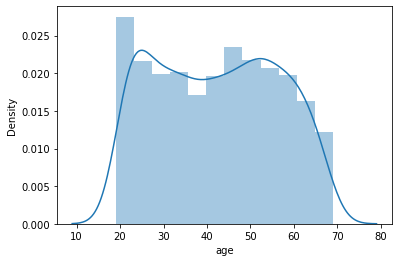

In [12]:
# import your code here

sns.distplot(df['age'])# to find skewness ,IQR ,For zscore outliers are not efficient

In [13]:
df['age'].skew() 
#values liew within 0 range ,so there is no skewness

0.04359793424360781

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

D:\DataScience\Workspace\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

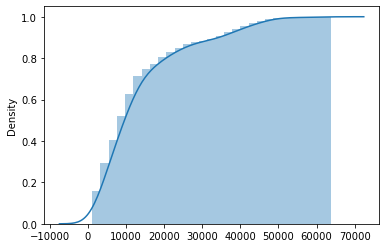

In [18]:
# import your code here
df.head()
df[df['medical_cost']>25000]
sns.distplot(x=df['medical_cost'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
#hist_kws -show histogram which is cumulative added
#kde -Kernel density show the crve

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

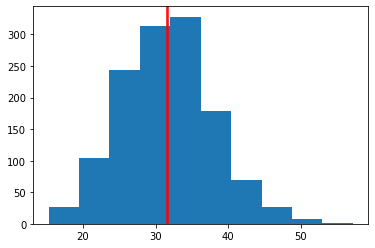

In [25]:
# import your code here
plt.hist(df['bmi'])
plt.axvline(df['bmi'].mean(),color='red')
plt.axvline(df['bmi'].median(),color='red')

In [27]:
df['bmi'].skew()

0.2496769760401315

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

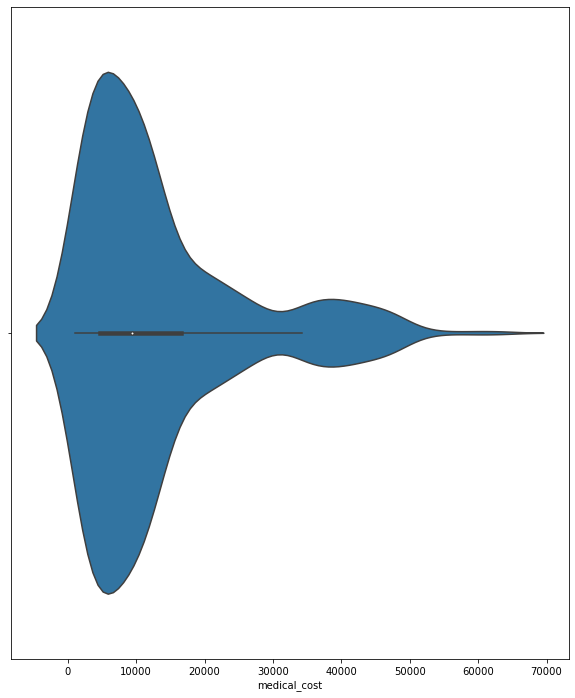

In [32]:
# import your code here
plt.figure(figsize=(10,12))
sns.violinplot(x=df['medical_cost'])

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# import your code here
a=df[(df['age']<30) & (df['medical_cost']> 40000)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

D:\DataScience\Workspace\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medical_cost', ylabel='bmi'>

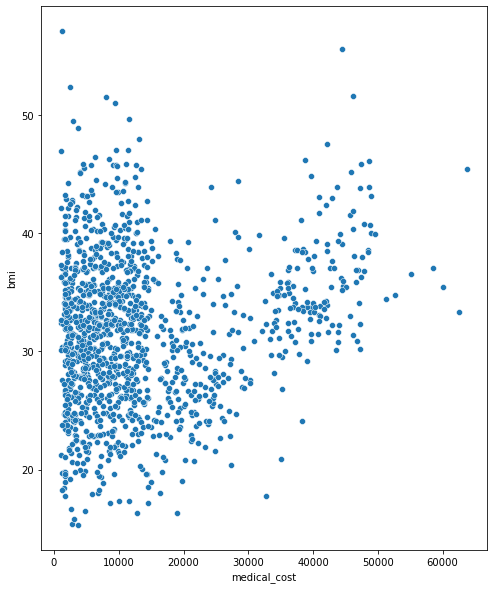

In [39]:
# import your code here
plt.figure(figsize=(8,10))
sns.scatterplot(df['medical_cost'],df['bmi'])
# There is no symmetric for BMI and medical cost

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# import your code here
mu=df.groupby('gender')['bmi'].mean()
sigma=df.groupby('gender')['bmi'].std()
cv=sigma/np.abs(mu)*100
cv

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

In [41]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# import your code here
#df.groupby('region')['gender'].count()

pd.crosstab(df['gender'],df['region'])
# South east has highest number of Male

region,northeast,northwest,southeast,southwest
gender,,,,
F,174,149,178,156
M,141,166,178,158


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

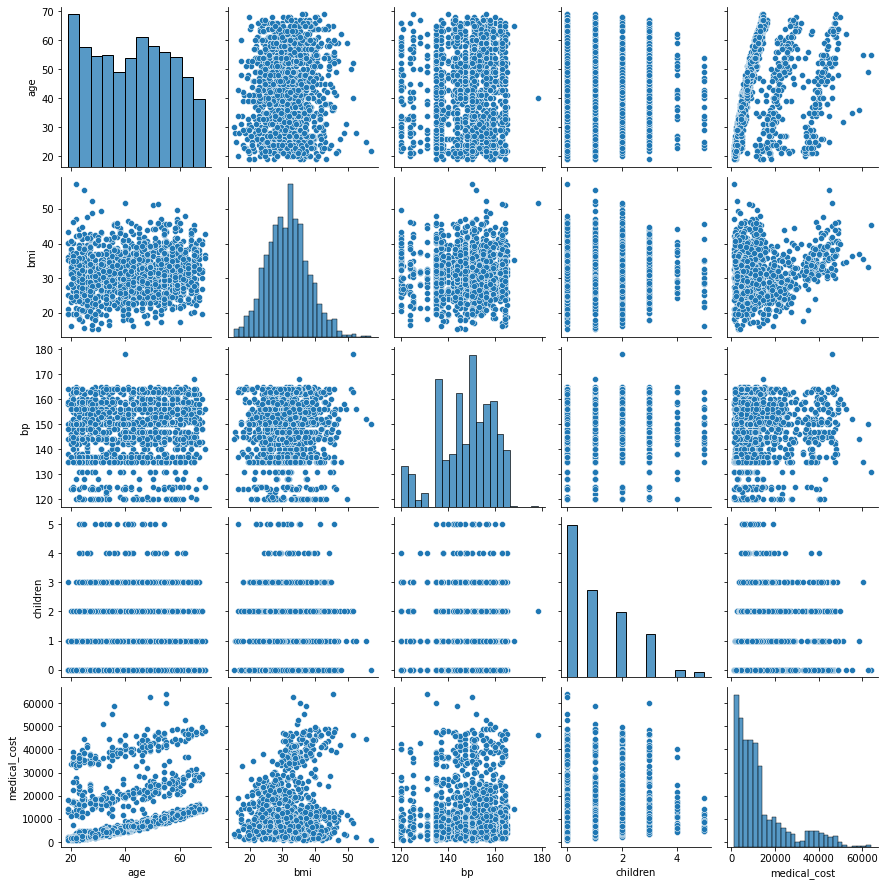

In [65]:
# import your code here

#Below both are same
#pd.plotting.scatter_matrix(df)
sns.pairplot(df)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='smoker', ylabel='medical_cost'>

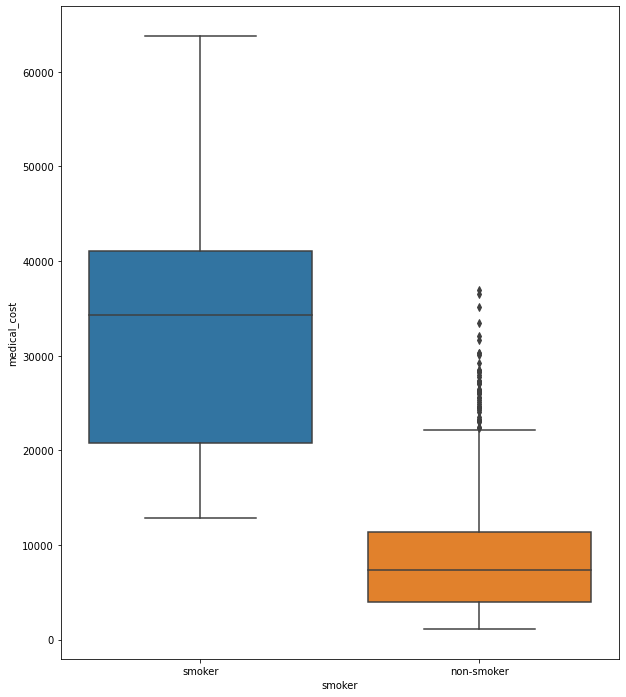

In [67]:
# import your code here
plt.figure(figsize=(10,12))
sns.boxplot(x=df['smoker'],y=df['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age', ylabel='medical_cost'>

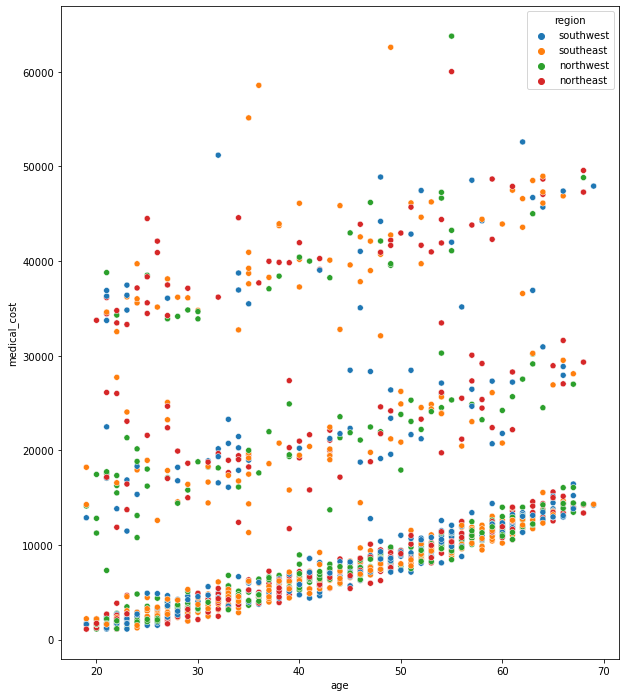

In [71]:
# import your code here
plt.figure(figsize=(10,12))
sns.scatterplot(x=df['age'],y=df['medical_cost'],hue=df['region'])

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# import your code here
df.head()
df['region'].unique()
df['region'].value_counts()

southeast    356
northeast    315
northwest    315
southwest    314
Name: region, dtype: int64

In [78]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


In [84]:
# import your code here
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
df['smoker_label']=labelEncoder.fit_transform(df['smoker'])
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0
...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0


In [82]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,smoker
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,non-smoker
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,non-smoker
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,non-smoker
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,non-smoker
...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,non-smoker
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,non-smoker
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,non-smoker
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,non-smoker


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
# import your code here
encoding=df.groupby('gender').size()
encoding=encoding/len(df)
df['freq_encoded_gender']=df['gender'].map(encoding)
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_encoded_gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385
...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# import your code here
df['check_smoke']=pd.get_dummies(df['smoker'] ,drop_first=True)
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_encoded_gender,check_smoke
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385,0
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615,0
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615,0
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# import your code here
# StandardScaler has mean to o and variance to 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_bmi=sc.fit_transform(df[['bmi']])
scaled_bmi

array([[ 0.05014192],
       [ 0.8165832 ],
       [ 0.53802035],
       ...,
       [ 0.51441333],
       [-1.06725708],
       [ 0.23427668]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# import your code here
df['age'].max()

69

In [100]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
trnsformed_age=min_max.fit_transform(df[['age']])
trnsformed_age

array([[0.08],
       [0.02],
       [0.28],
       ...,
       [0.04],
       [0.06],
       [0.88]])

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
# import your code here
df['medical_cost'].skew()
df['log_med_cost']=np.log(df['medical_cost'])
df['log_med_cost'].skew()

-0.09331493541417475

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [114]:
# import your code here
df['log_med_cost']
df['exp_medical_log']=np.exp(df['log_med_cost'])
df

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_encoded_gender,check_smoke,log_med_cost,exp_medical_log
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1,9.734176,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0,7.453302,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0,8.400538,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0,9.998092,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0,8.260197,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0.505385,0,9.268661,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,0,0.494615,0,7.698927,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0.494615,0,7.396233,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,0.494615,0,7.604867,2007.94500


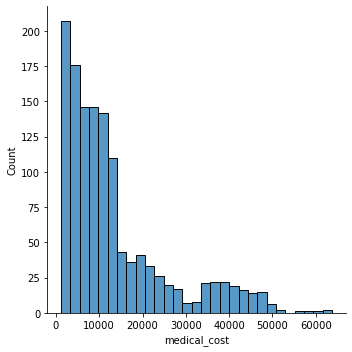

In [115]:
sns.displot(df['medical_cost'])

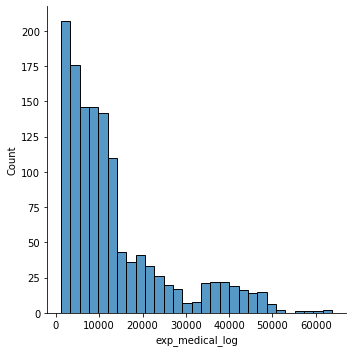

In [119]:
sns.displot(df['exp_medical_log'])